In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import squarify
from scipy.stats import norm
import plotly.express as px
import plotly.figure_factory as ff

In [162]:
df = pd.read_csv('sat.trn', header=None)
df_test = pd.read_csv('sat.tst', header=None)

In [163]:
data_len = df[0].count()

In [164]:
images = []
classes = []
for i in range(0,data_len):
    images.append(df.values[i][0][0:len(df.values[i][0])-1])
    classes.append(df.values[i][0][-1])

In [165]:
for i in range(0,data_len):
    images[i] = images[i].split(' ');
    images[i] = np.array(images[i])
    images[i] = images[i][0:len(images[i])-1]
    images[i] = images[i].astype(np.int64)
classes = np.array(classes)
classes.astype(np.int64)

array([3, 3, 3, ..., 4, 4, 4])

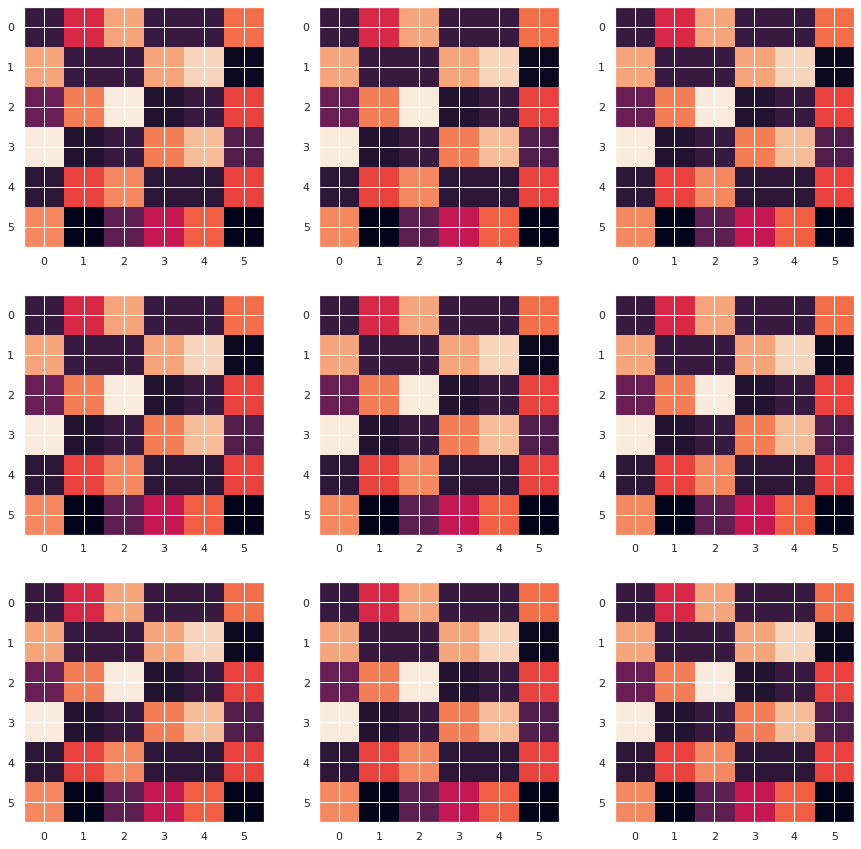

In [166]:
fig, axes = plt.subplots(3, 3,figsize=(15,15))
n_samples = 9
for i in range(n_samples):
    for x in range(3):
        for y in range(3):
            axes[x, y].imshow(images[i].reshape((6,6)))
plt.show()

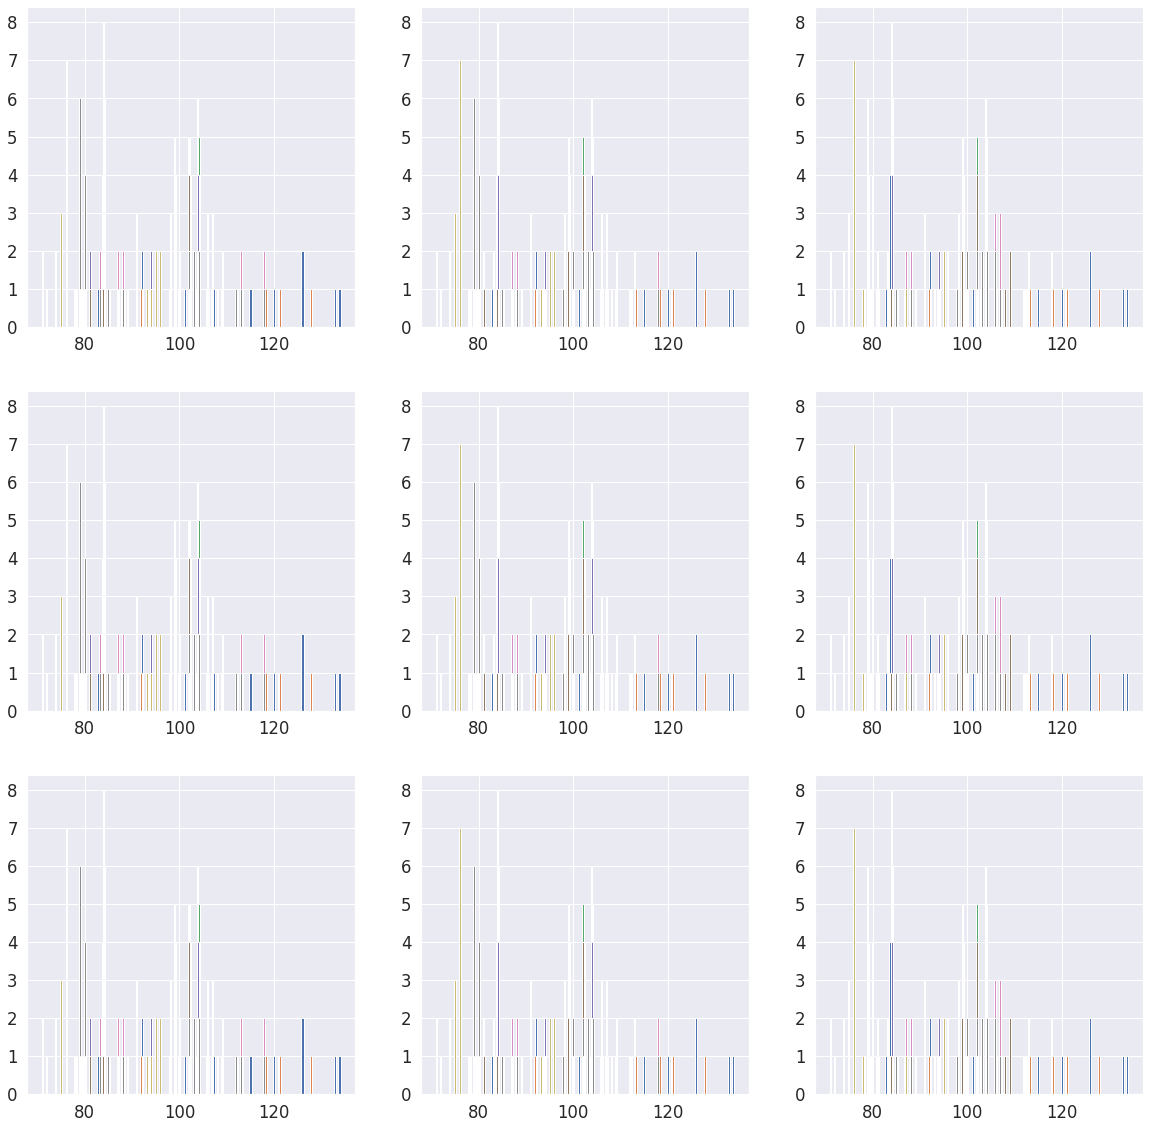

In [108]:
fig, axes = plt.subplots(3, 3,figsize=(20,20))
n_samples = 9
for i in range(n_samples):
    for x in range(3):
        for y in range(3):
            axes[x, y].hist(images[i], bins=120)
plt.show()

In [167]:
df = pd.DataFrame(data=images)

def f(x):
    return {
        1: "red_soil",
        2: "cotton_crop",
        3: "grey_soil",
        4: "damp_grey_soil",
        5: "soil_with_vegetation_stubble",
        6: "mixtures",
        7: "very_damp_grey_soil"
    }[x]

classes1 = []
for i in range(data_len):
    key = int(classes[i])
    classes1.append(f(key))

df['class'] = classes1

In [168]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000
mean,69.473957,83.855242,99.322886,82.555581,69.208794,83.499436,99.174521,82.480496,68.963472,83.131003,...,99.324690,82.673957,69.033145,83.434273,99.183766,82.638106,68.797069,83.153326,99.061556,82.584442
std,13.649635,22.725079,16.672166,18.695450,13.552423,22.811809,16.627583,18.714272,13.497858,22.813312,...,16.701527,18.884322,13.533934,22.812090,16.741240,18.939820,13.437785,22.762684,16.660735,18.895513
min,40.000000,27.000000,56.000000,33.000000,40.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,53.000000,34.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000
25%,60.000000,71.000000,85.000000,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,85.000000,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000
50%,68.000000,87.000000,101.000000,83.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,101.000000,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,...,113.000000,92.000000,79.500000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000
max,104.000000,137.000000,140.000000,154.000000,102.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,140.000000,154.000000,104.000000,128.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000


In [169]:
df['class'].value_counts()

red_soil                        1072
very_damp_grey_soil             1038
grey_soil                        961
cotton_crop                      479
soil_with_vegetation_stubble     470
damp_grey_soil                   415
Name: class, dtype: int64

In [170]:
group_labels = [16, 17, 18, 19]

att1 = df[16]
att2 = df[17]
att3 = df[18]
att4 = df[19]

fig = ff.create_distplot([att1, att2, att3, att4], group_labels, bin_size=0.5)
fig.show()

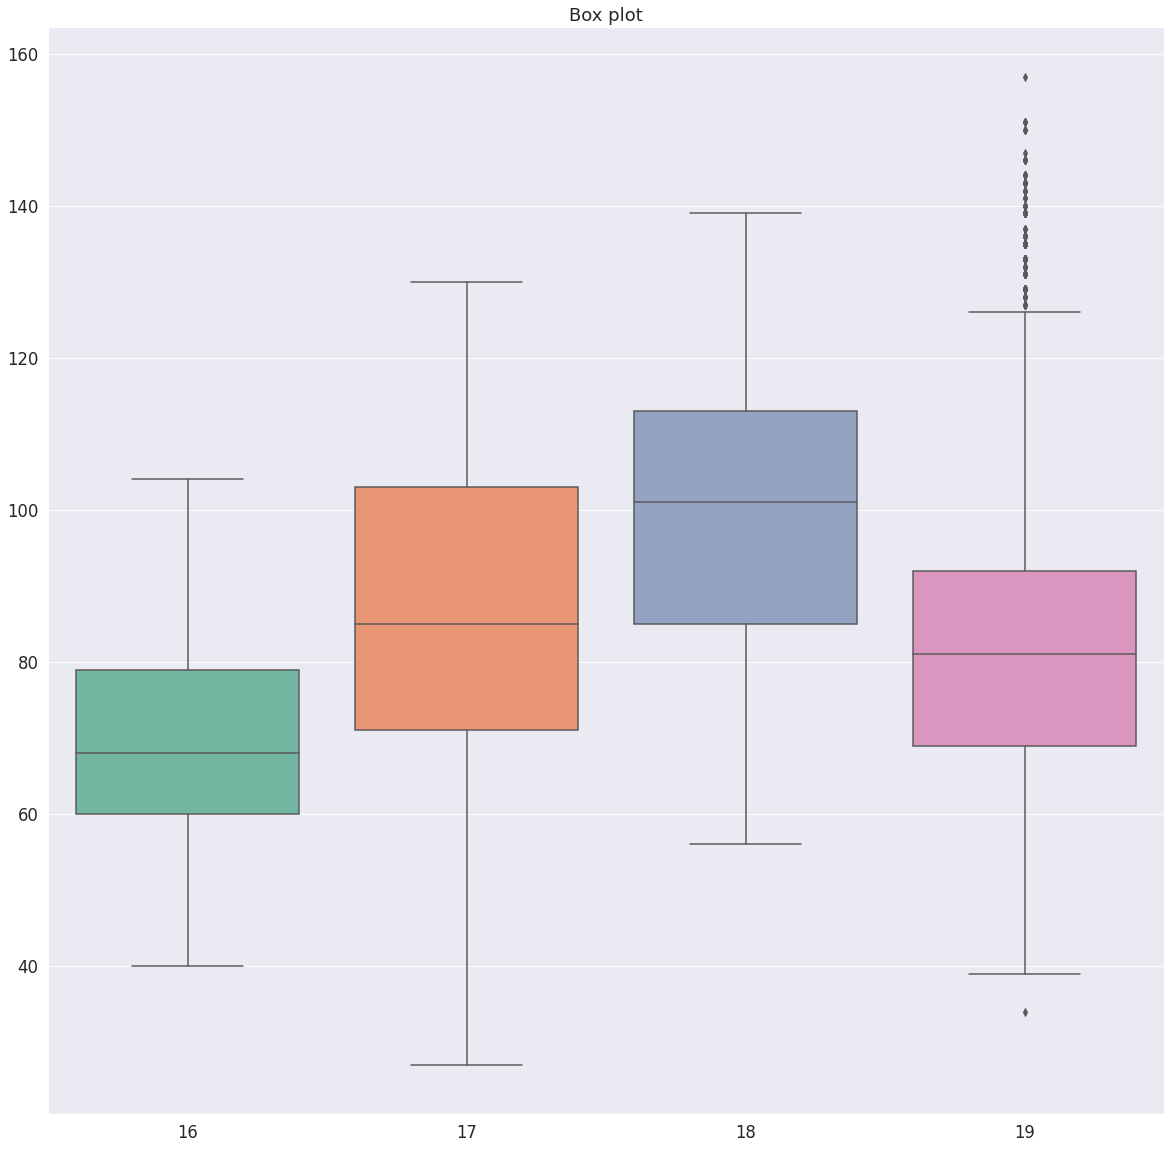

In [171]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20, 20)})

ax = sns.boxplot(data=df[[16,17,18,19]], orient="v", palette="Set2")

ax = ax.set_title('Box plot')


# fig = px.box(df.drop("Id",axis=1), y="PetalWidthCm")
# fig.show()

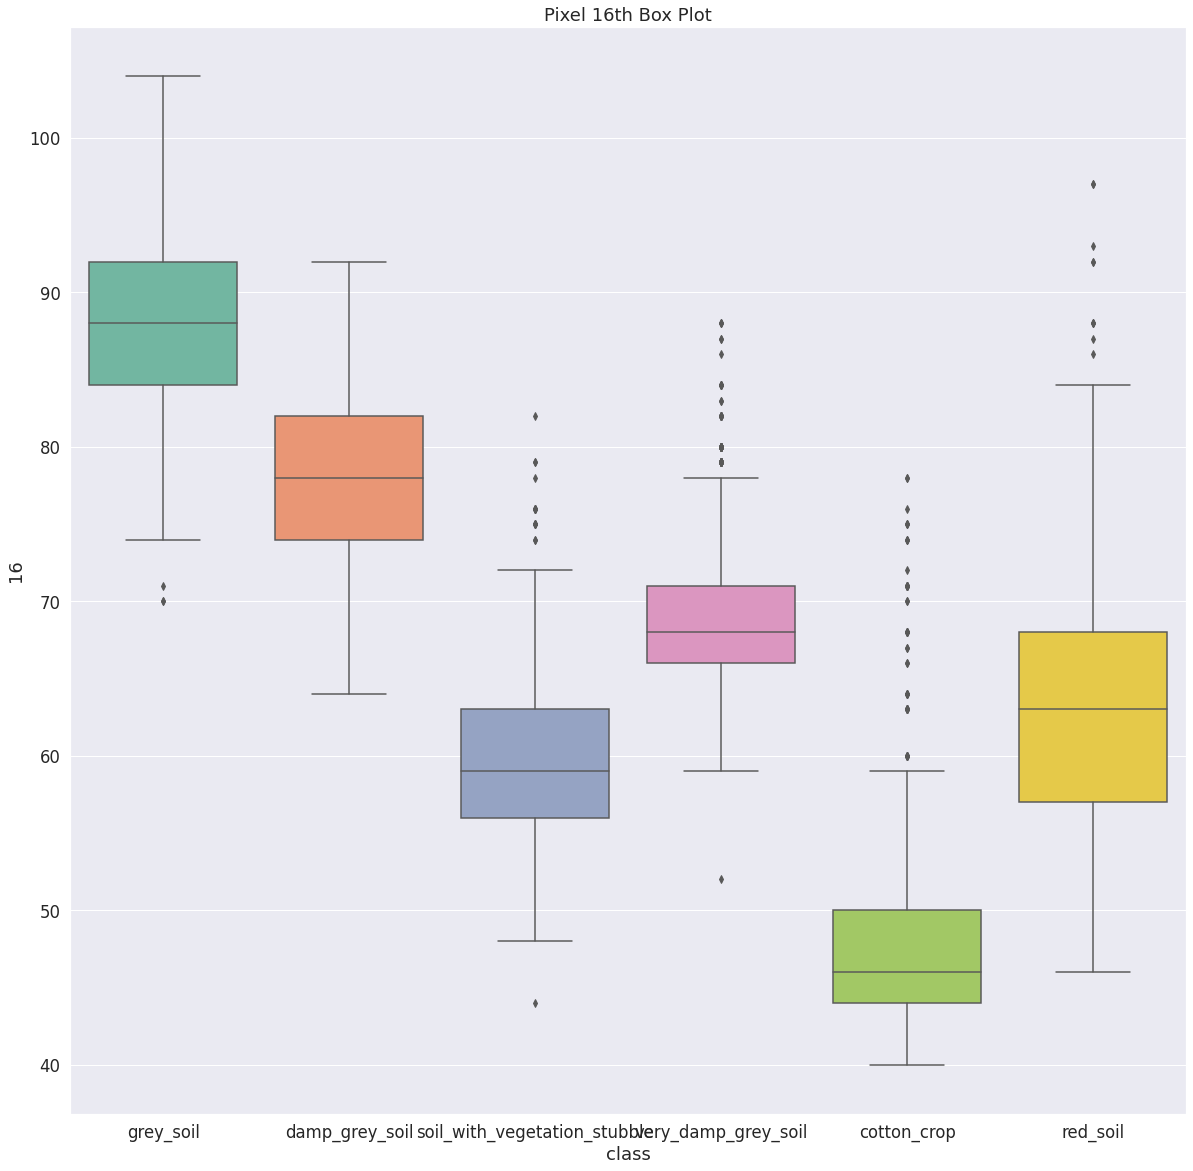

In [172]:
ax = sns.boxplot(x="class", y=16, palette="Set2", data=df)

ax = ax.set_title('Pixel 16th Box Plot')

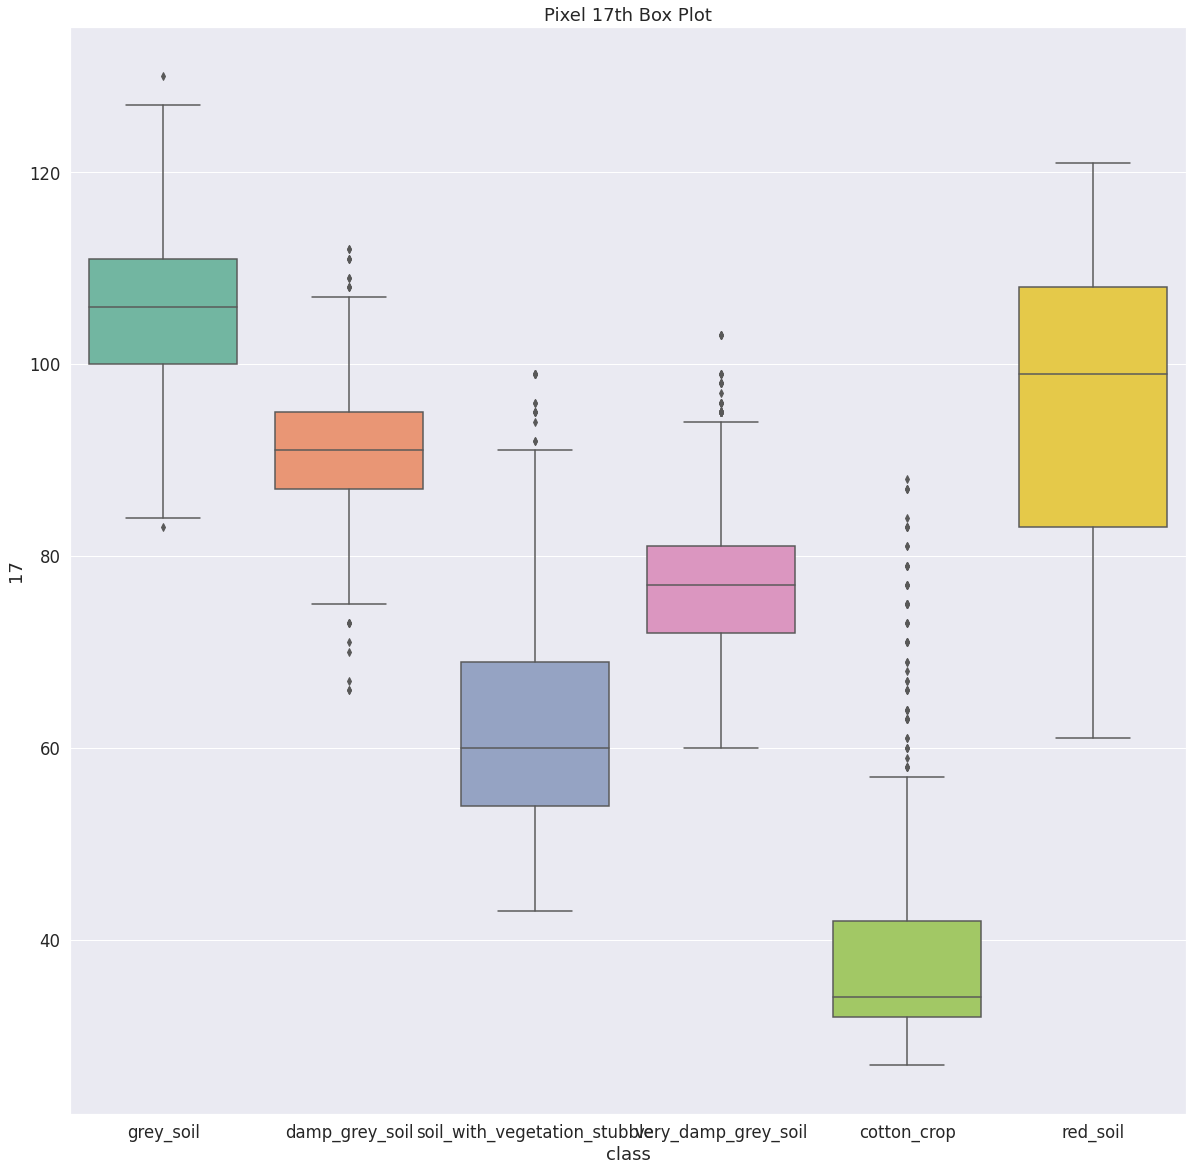

In [173]:
ax = sns.boxplot(x="class", y=17, palette="Set2", data=df)

ax = ax.set_title('Pixel 17th Box Plot')

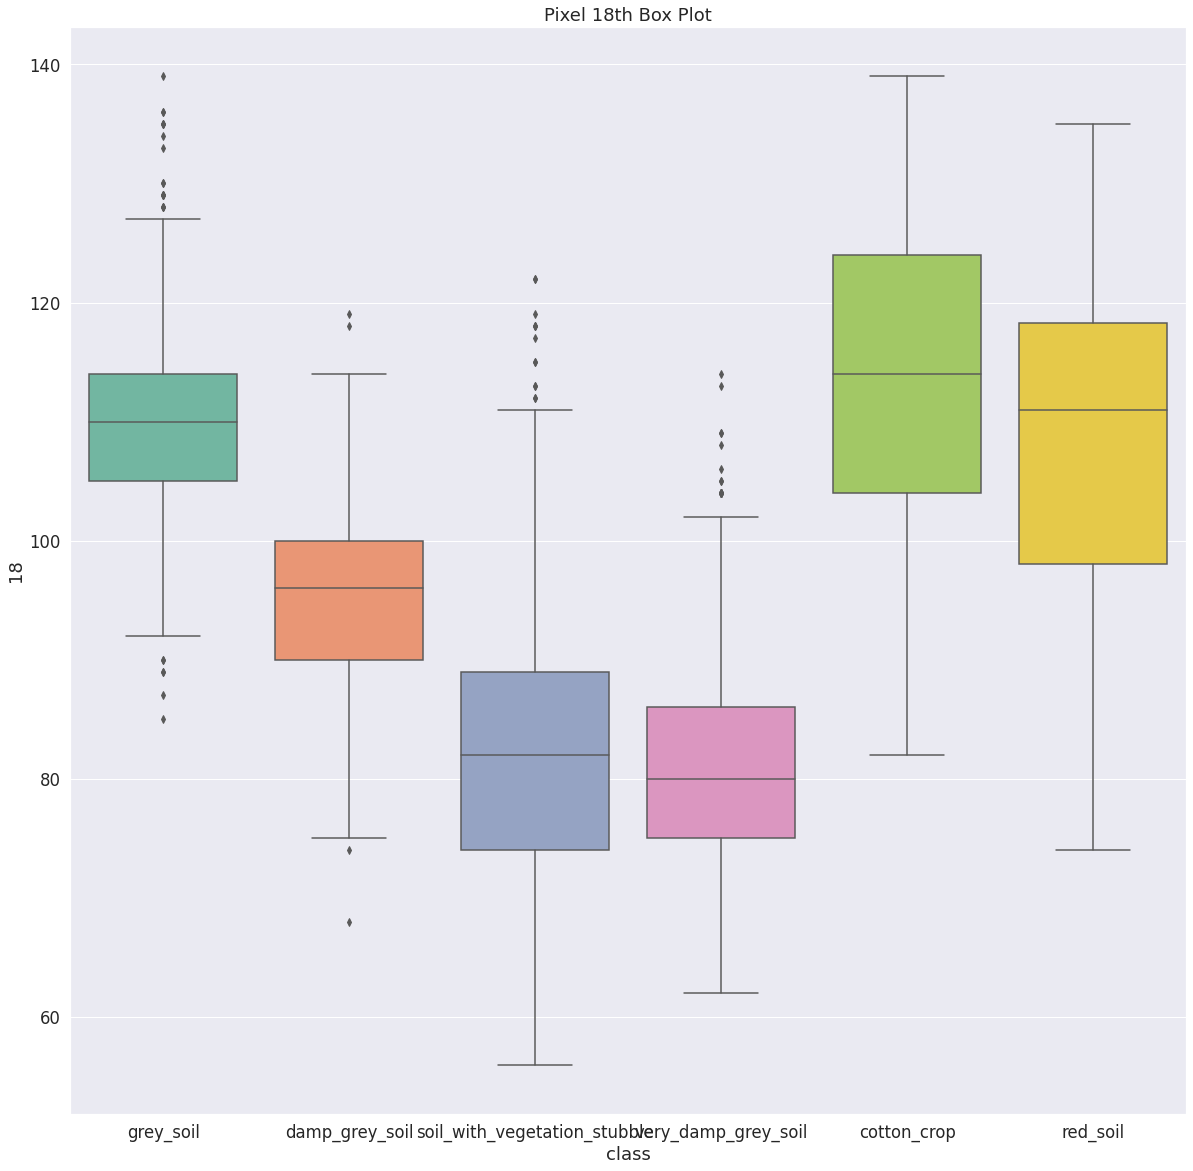

In [174]:
ax = sns.boxplot(x="class", y=18, palette="Set2", data=df)

ax = ax.set_title('Pixel 18th Box Plot')

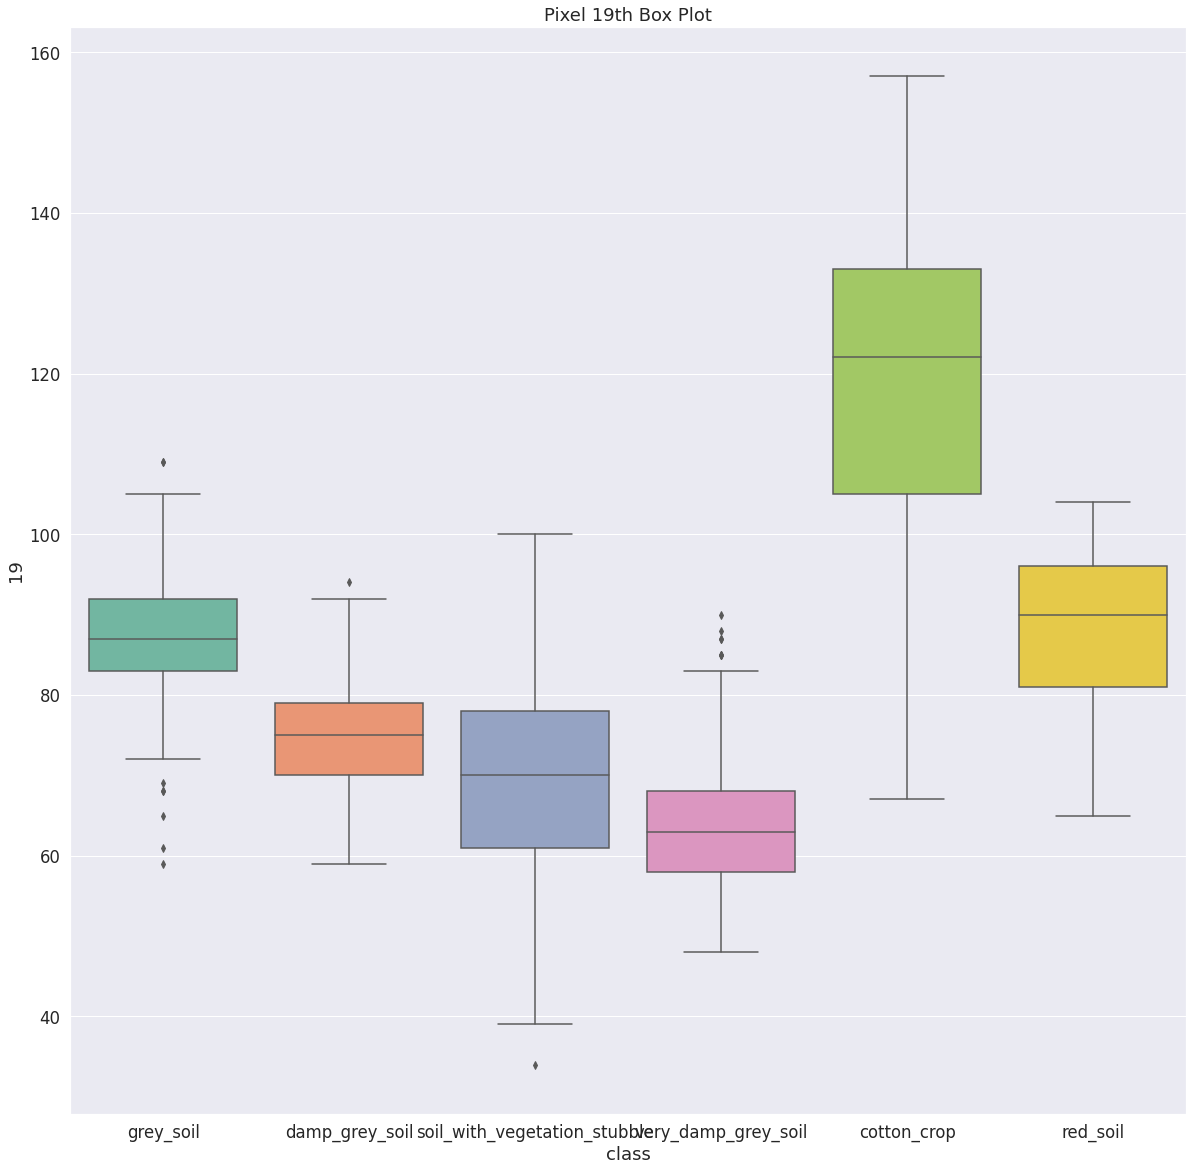

In [175]:
ax = sns.boxplot(x="class", y=19, palette="Set2", data=df)

ax = ax.set_title('Pixel 19th Box Plot')

In [176]:
df1 = pd.DataFrame({'Counts': df['class'].value_counts(),'Classes': df['class'].unique()})

fig = px.pie(df1, values='Counts' , names='Classes')
fig.show()

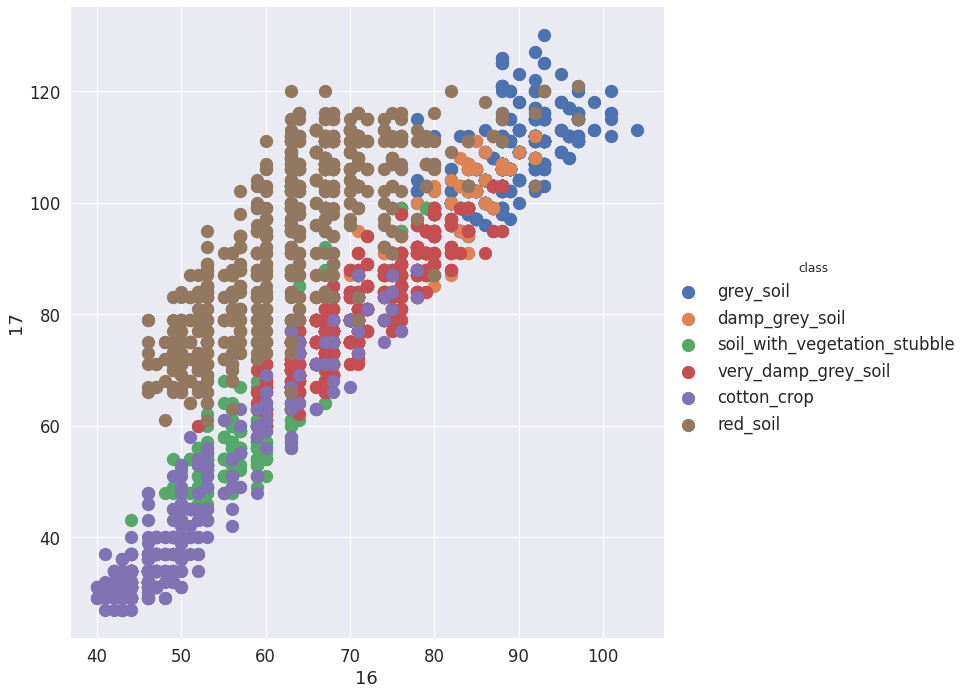

In [177]:
sns.set(font_scale=1.5) 

axs = sns.FacetGrid(df, hue="class", height=10).map(plt.scatter, 16, 17, s=150).add_legend()

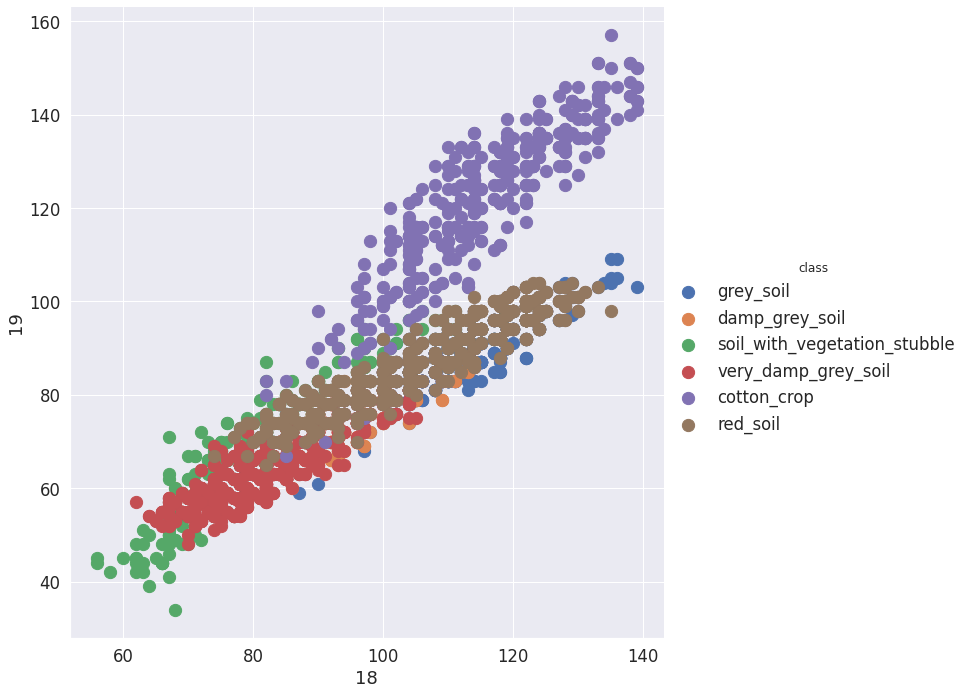

In [178]:
sns.set(font_scale=1.5) 

axs = sns.FacetGrid(df, hue="class", height=10).map(plt.scatter, 18, 19, s=150).add_legend()

<Figure size 1440x1440 with 0 Axes>

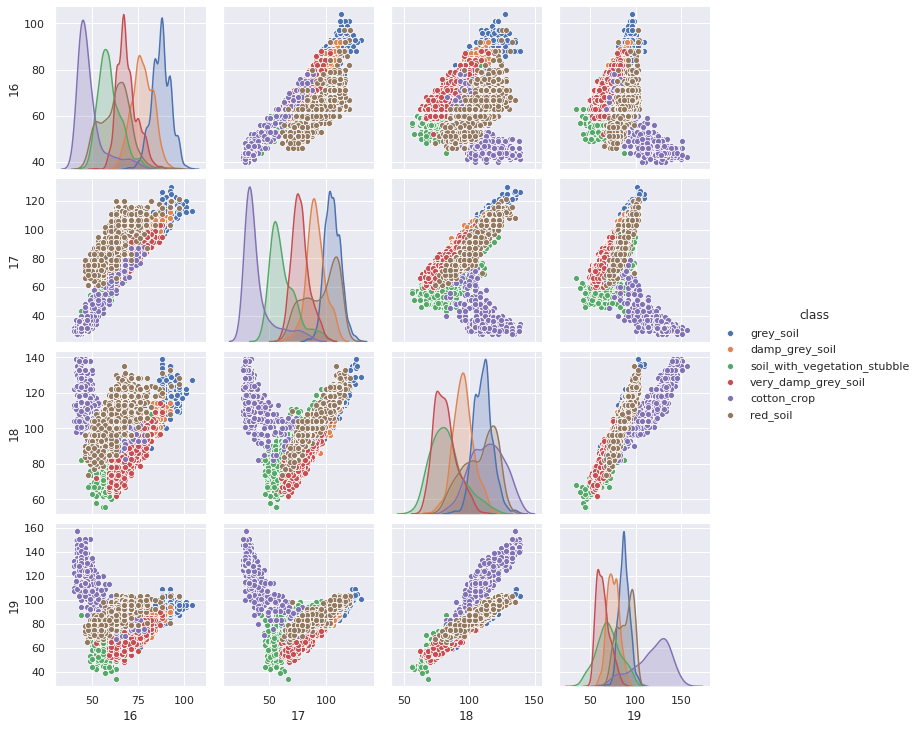

In [183]:
sns.set(font_scale=1.0) 
plt.figure(figsize=(20, 20))

axs = sns.pairplot(df[[16,17,18,19,'class']], hue='class')

In [184]:
df["Class_Id"] = df["class"].astype('category').cat.codes

print(df[['Class_Id','class']]['class'].unique())
print(df[['Class_Id','class']]['Class_Id'].unique())

['grey_soil' 'damp_grey_soil' 'soil_with_vegetation_stubble'
 'very_damp_grey_soil' 'cotton_crop' 'red_soil']
[2 1 4 5 0 3]


In [185]:
fig = px.parallel_coordinates(
    df,
    color = "Class_Id",
    dimensions=
    [
        16,
        17,
        18,
        19,
        'Class_Id'
    ],
    color_continuous_scale = px.colors.diverging.Portland,
    color_continuous_midpoint = 3
)
fig.show()